In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# font 설정
import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~')
import seaborn as sns

# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('../다콘프로젝트/제주데이터/201901-202003.csv', encoding='utf-8', parse_dates=['REG_YYMM'])
df

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [3]:
df.describe()

,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
count,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07
mean,1.412645e+00,2.804429e+00,6.196855e+01,2.441353e+06,1.260450e+02
std,4.923099e-01,1.375455e+00,3.559175e+02,1.726096e+07,9.669387e+02
min,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+01,1.000000e+00
25%,1.000000e+00,2.000000e+00,4.000000e+00,9.020000e+04,5.000000e+00
50%,1.000000e+00,3.000000e+00,8.000000e+00,2.526800e+05,1.200000e+01
75%,2.000000e+00,4.000000e+00,2.400000e+01,8.433372e+05,4.000000e+01
max,2.000000e+00,5.000000e+00,3.281300e+04,2.349524e+09,1.203570e+05


# 월별 AMT 사용량 

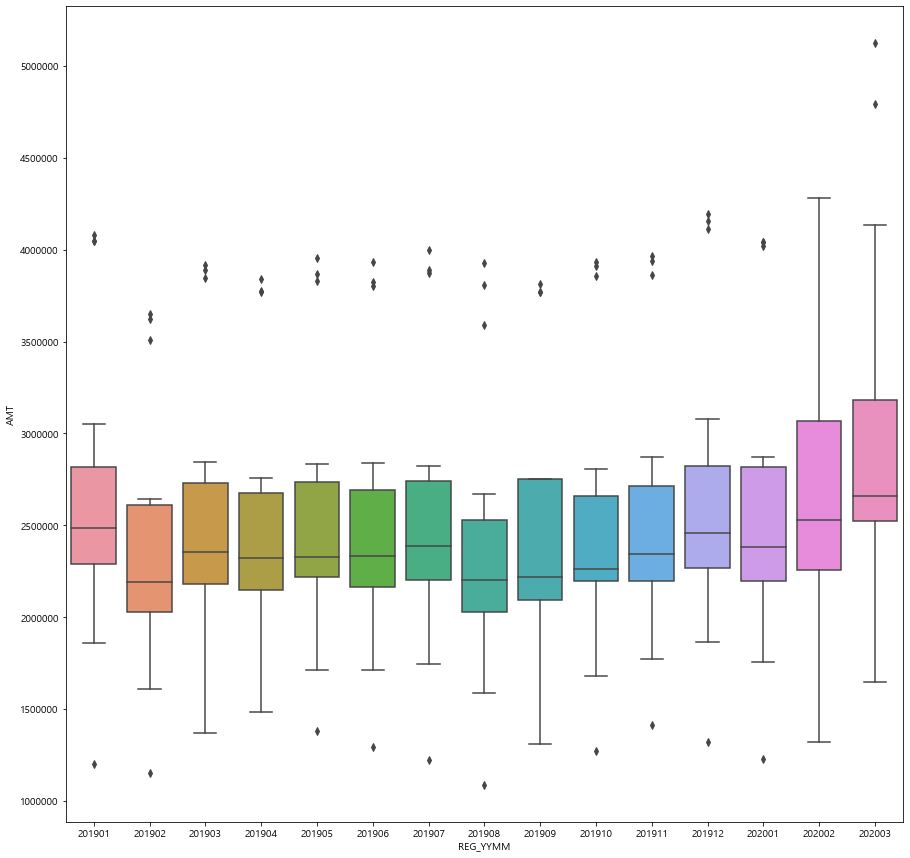

,REG_YYMM,CARD_SIDO_NM,AMT
0,201901,강원,1.201772e+06
1,201901,경기,2.819216e+06
2,201901,경남,3.049912e+06
3,201901,경북,2.374588e+06
4,201901,광주,4.047791e+06
...,...,...,...
250,202003,전남,2.524671e+06
251,202003,전북,2.923777e+06
252,202003,제주,3.969450e+06
253,202003,충남,2.102221e+06


In [4]:
# 사용지역(시도)이랑 월별을 하려고 했지만
# 사용지역이 안되서 월별 사용량

df2 = df.pivot_table(index=['REG_YYMM', 'CARD_SIDO_NM'], values='AMT')
df2 = df2.reset_index()

plt.figure(figsize=(15,15))
sns.boxplot(x='REG_YYMM', y='AMT', data=df2)
plt.show()
df2

# 지역별 데이터 나눔

In [5]:
data_busan = pd.read_csv('../다콘프로젝트/제주데이터/data_busan.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
data_chungbuk = pd.read_csv('../다콘프로젝트/제주데이터/data_chungbuk.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
data_chungnam = pd.read_csv('../다콘프로젝트/제주데이터/data_chungnam.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
data_daegu = pd.read_csv('../다콘프로젝트/제주데이터/data_daegu.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
data_daejeon = pd.read_csv('../다콘프로젝트/제주데이터/data_daejeon.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
data_gangwon = pd.read_csv('../다콘프로젝트/제주데이터/data_gangwon.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
data_gwangju = pd.read_csv('../다콘프로젝트/제주데이터/data_gwangju.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])
data_gyeongbuk = pd.read_csv('../다콘프로젝트/제주데이터/data_gyeongbuk.csv', encoding='utf-8', index_col=0, parse_dates=['REG_YYMM'])

In [6]:
data_gyeongi = pd.read_csv('../다콘프로젝트/제주데이터/data_gyeongi.csv', encoding='utf-8', index_col=0)
data_gyeongnam = pd.read_csv('../다콘프로젝트/제주데이터/data_gyeongnam.csv', encoding='utf-8', index_col=0)
data_incheon = pd.read_csv('../다콘프로젝트/제주데이터/data_incheon.csv', encoding='utf-8', index_col=0)
data_jeju = pd.read_csv('../다콘프로젝트/제주데이터/data_jeju.csv', encoding='utf-8', index_col=0)
data_jeonbuk = pd.read_csv('../다콘프로젝트/제주데이터/data_jeonbuk.csv', encoding='utf-8', index_col=0)
data_jeonnam = pd.read_csv('../다콘프로젝트/제주데이터/data_jeonnam.csv', encoding='utf-8', index_col=0)
data_sejong = pd.read_csv('../다콘프로젝트/제주데이터/data_sejong.csv', encoding='utf-8', index_col=0)
data_seoul = pd.read_csv('../다콘프로젝트/제주데이터/data_seoul.csv', encoding='utf-8', index_col=0)
data_ulsan = pd.read_csv('../다콘프로젝트/제주데이터/data_ulsan.csv', encoding='utf-8', index_col=0)

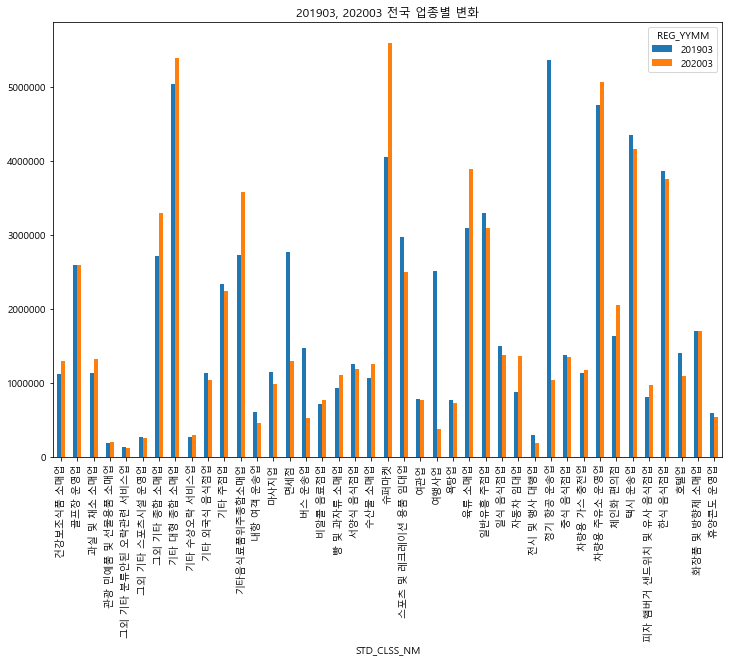

In [7]:
# 전지역 사용처별 AMT 평균

a = df[['REG_YYMM','STD_CLSS_NM', 'AMT']]
a2 = a.pivot_table(index=['STD_CLSS_NM'], values='AMT', columns='REG_YYMM')

a2.iloc[:, [2,14]].plot(kind='bar', title='201903, 202003 전국 업종별 변화', figsize=(12,8))

# 19년 4, 7월 지역별, 업종별 AMT평균 그래프
# 20년 1 ~ 3월과 19년 1 ~ 3월까지 비교 바 그래프


# 1. 부산

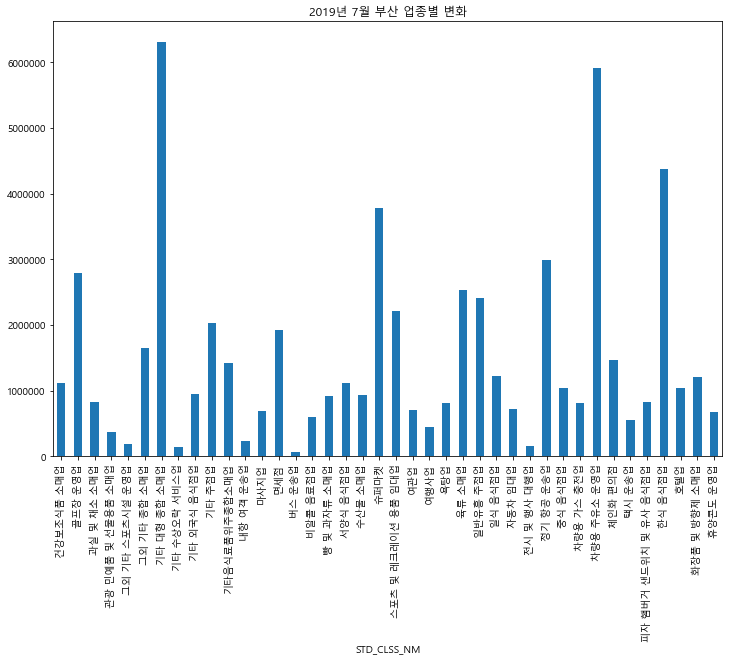

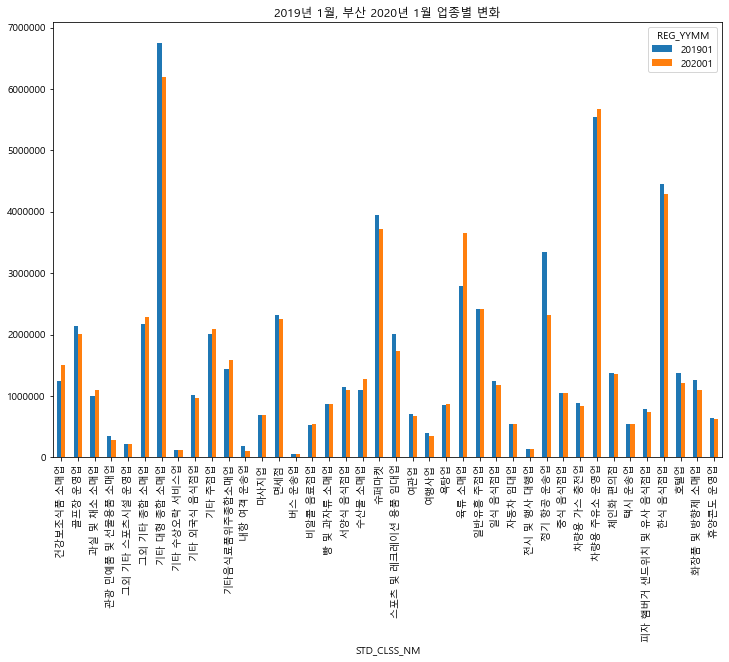

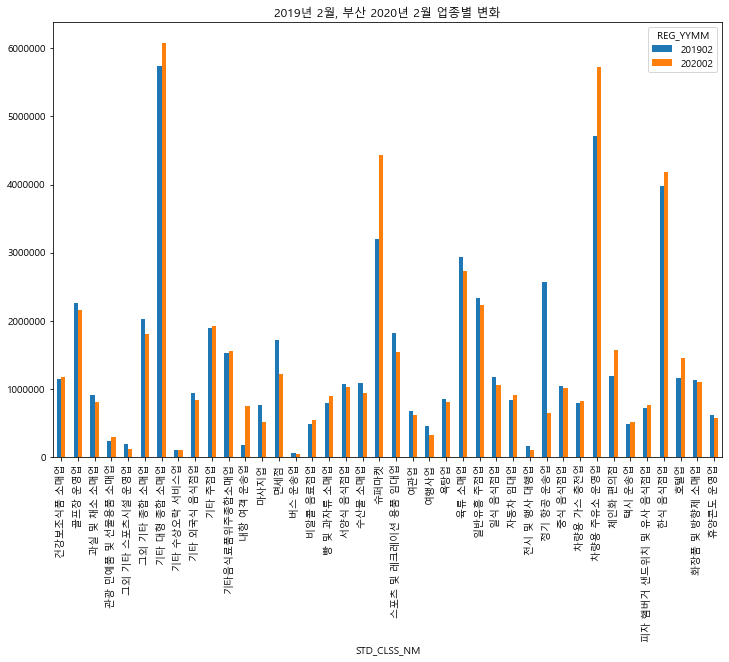

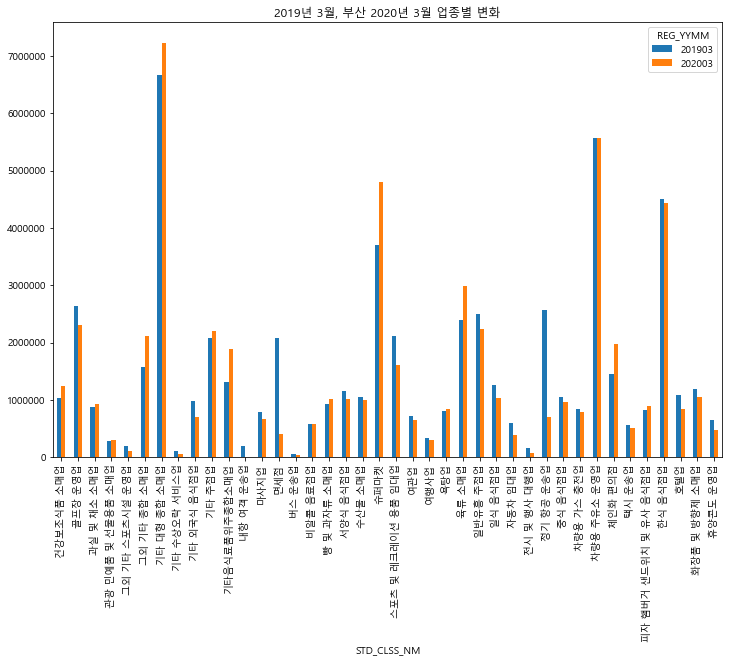

In [8]:
df_busan = data_busan[['REG_YYMM','STD_CLSS_NM', 'AMT']]

# 19년 4월
df_busan = df_busan.pivot_table(index=['STD_CLSS_NM'], values='AMT', columns='REG_YYMM')

df_busan.iloc[:, 3].plot(kind='bar', title='2019년 4월 부산 업종별 변화', figsize=(12,8))

# 19년 7월
df_busan.iloc[:, 6].plot(kind='bar', title='2019년 7월 부산 업종별 변화', figsize=(12,8))

# 19년 1월, 20년 1월 비교
df_busan.iloc[:, [0, 12]].plot(kind='bar', title='2019년 1월, 부산 2020년 1월 업종별 변화', figsize=(12,8))

# 19년 2월, 20년 2월 비교
df_busan.iloc[:, [1, 13]].plot(kind='bar', title='2019년 2월, 부산 2020년 2월 업종별 변화', figsize=(12,8))

# 19년 3월, 20년 3월 비교
df_busan.iloc[:, [2, 14]].plot(kind='bar', title='2019년 3월, 부산 2020년 3월 업종별 변화', figsize=(12,8))

부산

1. 20년 1월에 비해 2,3월에 작년대비 기타 대형 종합 소매업이 큰폭으로 증가
2. 20년 1월에 비해 2,3월에 작년대비 슈퍼마켓 큰폭으로 증가
4. 20년 1월부터 작년대비 항공업 점차 감소, 면세점 급감
5. 20년 3월 작년대비 기타 외국식 음식점업 감소
6. 20년 3월 작년대비 기타음식품위주종합소매업 증가(1,2월은 작년 대비 고만고만함)
7. 20년 2월 작년대비 내항 여객 운송업 증가 (1,3월은 비슷)
8. 20년 1,3월 작년대비 육류소매업 증가 (2월은 감소)
9. 20년 1,2월 작년대비 자동차 임대업 증가 (3월은 감소)
10. 20년 1월부터 3월까지 작년대비 체인화편의점 증가 

# 1-1. 부산 기간별, 업종별 AMT 그래프

In [9]:
df_busan2 = data_busan.pivot_table(index='REG_YYMM', columns='STD_CLSS_NM', values='AMT')

In [10]:
df_busan2.head()

STD_CLSS_NM,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 대형 종합 소매업,기타 수상오락 서비스업,기타 외국식 음식점업,기타 주점업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,피자 햄버거 샌드위치 및 유사 음식점업,한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
REG_YYMM,,,,,,,,,,,,,,,,,,,,,
201901,1.236312e+06,2.136863e+06,1.003394e+06,344912.453846,222909.433962,2.172924e+06,6.749587e+06,116150.370370,1.018280e+06,2.002055e+06,...,1.053880e+06,883223.939422,5.540651e+06,1.366834e+06,539981.048107,793742.923615,4.459042e+06,1.381491e+06,1.251993e+06,647407.359050
201902,1.144564e+06,2.270078e+06,9.139983e+05,240186.075472,201397.872340,2.028080e+06,5.736032e+06,108826.923077,9.479853e+05,1.893501e+06,...,1.048306e+06,795718.022616,4.717472e+06,1.186951e+06,490193.200817,723079.210179,3.979283e+06,1.170159e+06,1.127753e+06,624902.762951
201903,1.026403e+06,2.642642e+06,8.775197e+05,292804.883721,200178.750000,1.580387e+06,6.672740e+06,111153.571429,9.798039e+05,2.082042e+06,...,1.054287e+06,848005.913777,5.576897e+06,1.449923e+06,564846.768850,822070.451783,4.508480e+06,1.093595e+06,1.196650e+06,653567.120921
201904,1.057956e+06,2.637324e+06,8.327956e+05,373410.699588,185788.679245,1.551296e+06,6.308645e+06,119895.000000,9.349633e+05,2.032599e+06,...,1.027208e+06,818254.738593,5.668487e+06,1.454901e+06,546130.417404,832074.523201,4.383556e+06,9.798418e+05,1.207357e+06,637874.833984
201905,1.252397e+06,2.730642e+06,8.467948e+05,259849.925816,179710.344828,1.689864e+06,6.078547e+06,93800.000000,9.842528e+05,2.034391e+06,...,1.058678e+06,872617.492740,5.973713e+06,1.466723e+06,561489.916414,817063.106980,4.545703e+06,1.218130e+06,1.226639e+06,660208.024055


In [11]:
# 월단위로 좀 쪼갭시다.


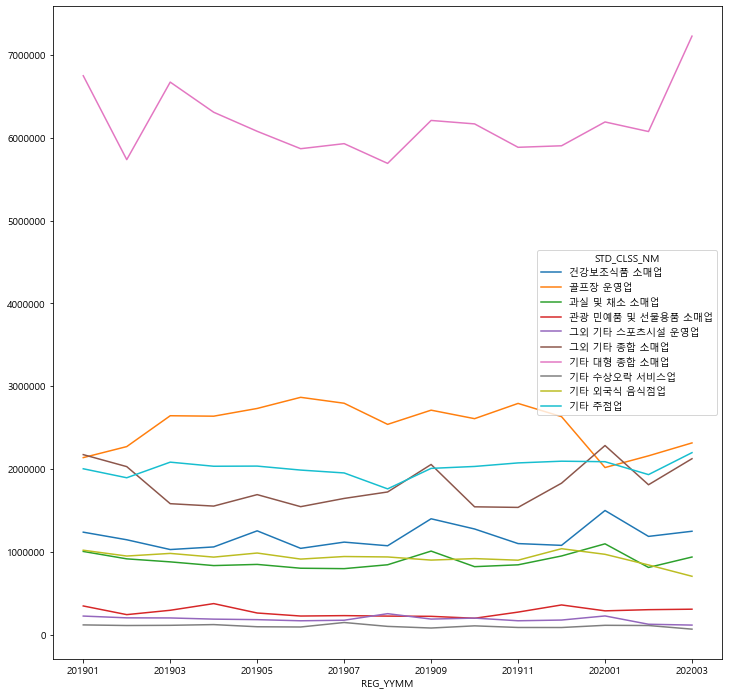

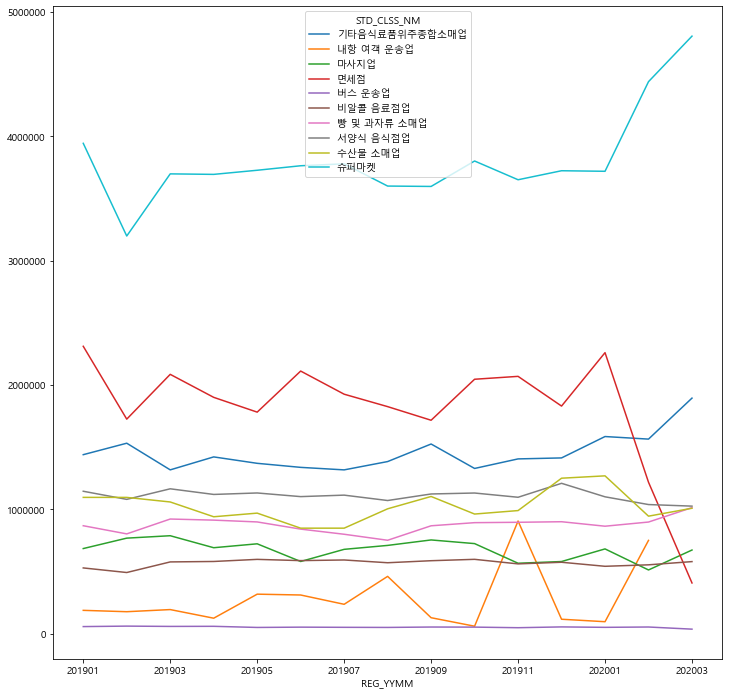

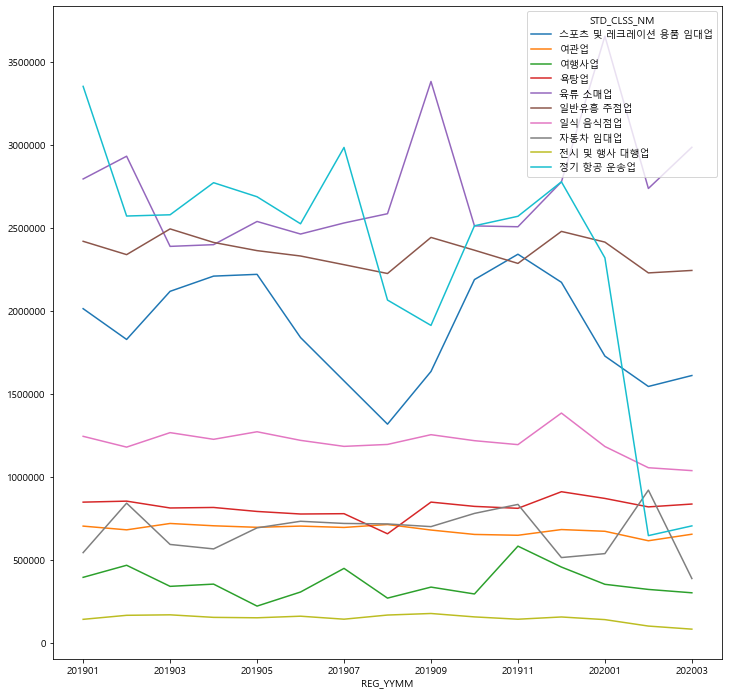

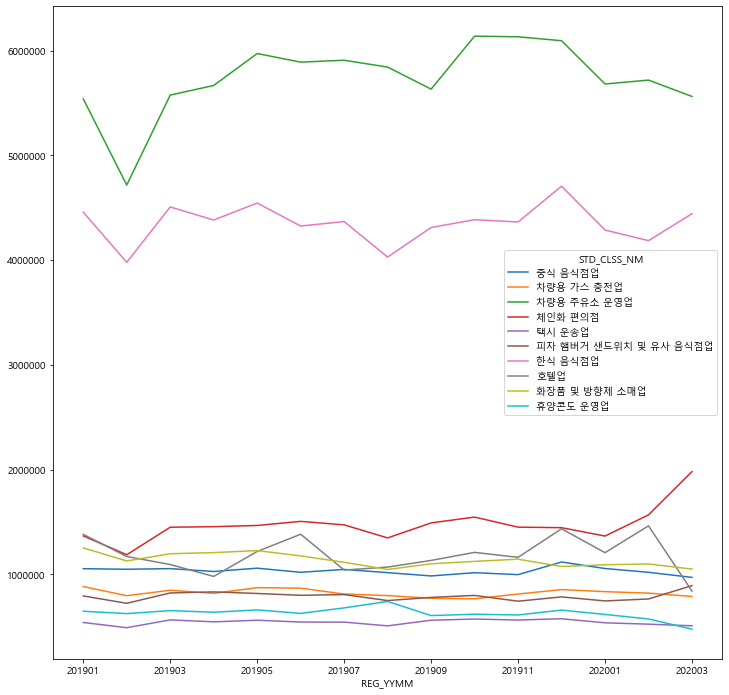

In [12]:
for i in range(0, 40, 10) :
    df_busan2.iloc[:, i:i+ 10].plot(figsize=(12,12))

# 2. 경북

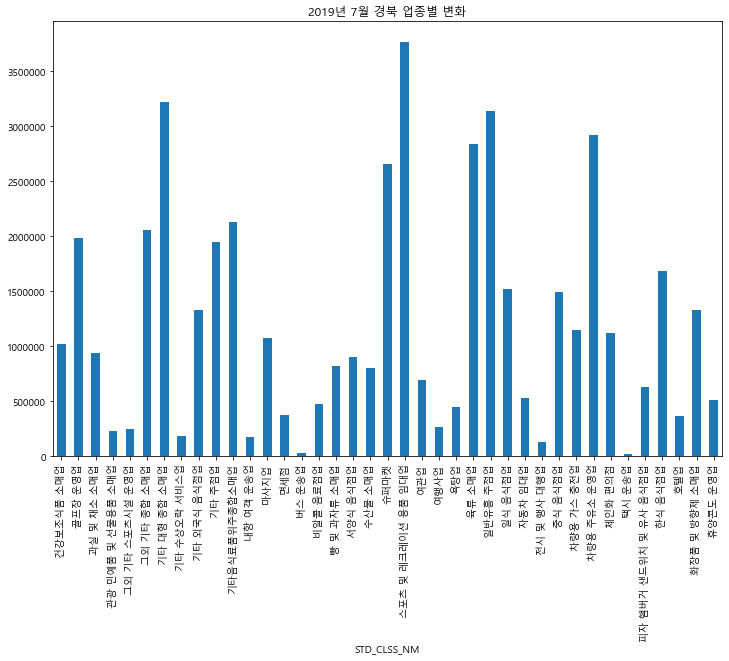

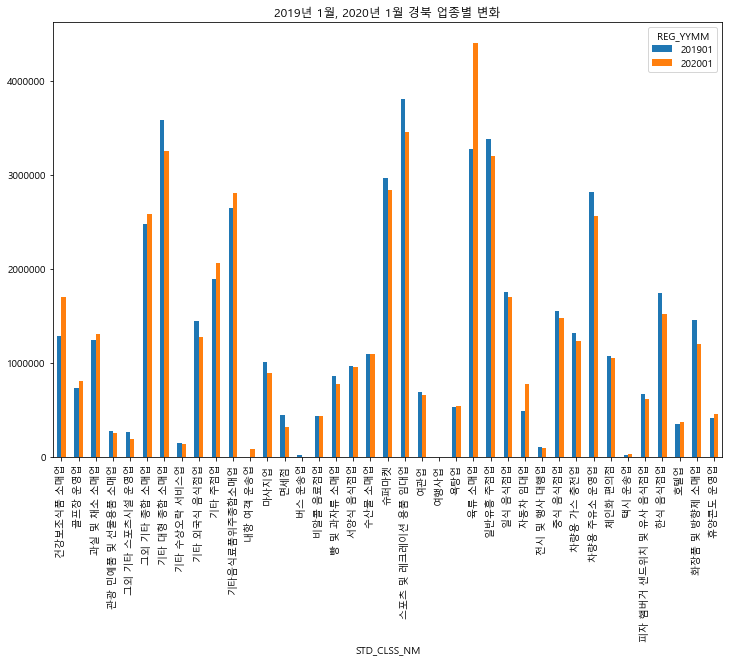

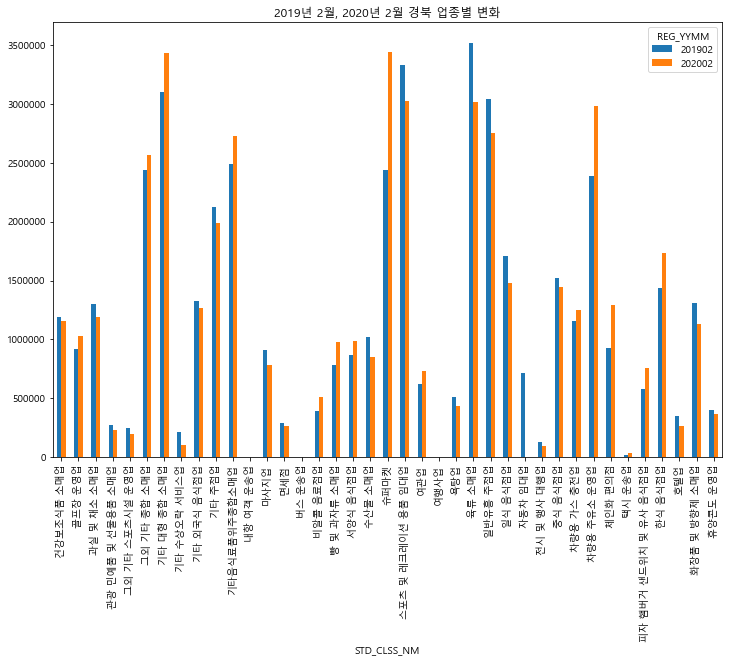

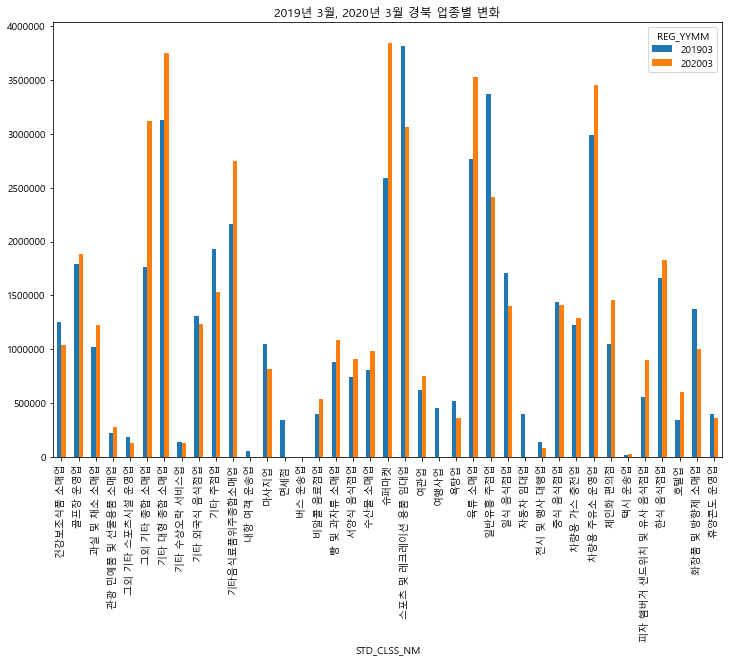

In [13]:
#경북
df_chungbuk = data_chungbuk[['REG_YYMM','STD_CLSS_NM', 'AMT']]

# 19년 4월
df_chungbuk = data_chungbuk.pivot_table(index=['STD_CLSS_NM'], values='AMT', columns='REG_YYMM')

df_chungbuk.iloc[:, 3].plot(kind='bar', title='2019년 4월 경북 업종별 변화', figsize=(12,8))

# 19년 7월
df_chungbuk.iloc[:, 6].plot(kind='bar', title='2019년 7월 경북 업종별 변화', figsize=(12,8))

# 19년 1월, 20년 1월 비교
df_chungbuk.iloc[:, [0, 12]].plot(kind='bar', title='2019년 1월, 2020년 1월 경북 업종별 변화', figsize=(12,8))

# 19년 2월, 20년 2월 비교
df_chungbuk.iloc[:, [1, 13]].plot(kind='bar', title='2019년 2월, 2020년 2월 경북 업종별 변화', figsize=(12,8))

# 19년 3월, 20년 3월 비교
df_chungbuk.iloc[:, [2, 14]].plot(kind='bar', title='2019년 3월, 2020년 3월 경북 업종별 변화', figsize=(12,8))

경북

1. 건강보조식품 소매업 점차 감소
2. 과실 및 채소 소매업 20년 2월 작년대비 감소 했다 3웰에 다시 증가
3. 그외 기타 종합 소매업 20년 1,2월 점자 증가하다가 3월에 급증
4. 기타 대형 종합 소매업 20년 1월부터 증가
5. 기타 주점업 20년 1월부터 점차 감소
6. 기타음식표품위주종합소매업 점차 증가
7. 육류 소매업 20년 2월 감소, 1,3월 급증
8. 20년 1월 자동차 임대업 2,3월 급락하다 못해 사라짐
9. 차량용 주유소 운영업 20년 1월 제외 2,3월 증가
10. 체인화 편의점 20년 1월이후부터 급증
11. 20년 1월 이후 피자 햄버거 샌드위치 및 유사 음식업점 증가
12. 20년 1월 이후 한식음식점 증가
13. 작년대비 20년 3월 호텔업 증가 

# 2-1. 경북 기간별, 업종별 AMT 그래프

In [14]:
df_chungbuk2 = data_chungbuk.pivot_table(index='REG_YYMM', columns='STD_CLSS_NM', values='AMT')

In [15]:
df_chungbuk2.head()

STD_CLSS_NM,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 대형 종합 소매업,기타 수상오락 서비스업,기타 외국식 음식점업,기타 주점업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,피자 햄버거 샌드위치 및 유사 음식점업,한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
REG_YYMM,,,,,,,,,,,,,,,,,,,,,
201901,1.293612e+06,7.366136e+05,1.247054e+06,276128.750000,264671.428571,2.481252e+06,3.592976e+06,155888.562500,1.445221e+06,1.901374e+06,...,1.552801e+06,1.323767e+06,2.821140e+06,1.081584e+06,19200.000000,671634.824976,1.752660e+06,357347.608247,1.463297e+06,422499.691489
201902,1.191417e+06,9.212242e+05,1.298704e+06,270300.757576,247296.666667,2.435941e+06,3.096737e+06,214478.947368,1.327703e+06,2.127889e+06,...,1.521395e+06,1.156025e+06,2.383615e+06,9.264278e+05,22673.333333,578521.445910,1.434011e+06,346523.969388,1.307961e+06,404566.295122
201903,1.255189e+06,1.795292e+06,1.024988e+06,225291.089109,189493.913043,1.761210e+06,3.125801e+06,144010.000000,1.306064e+06,1.932364e+06,...,1.436222e+06,1.226369e+06,2.985796e+06,1.051487e+06,20660.000000,558145.550349,1.661297e+06,349805.922330,1.378693e+06,400863.593284
201904,1.020122e+06,1.987373e+06,9.033223e+05,213611.012658,191831.818182,1.825162e+06,3.186595e+06,141043.750000,1.329174e+06,1.911631e+06,...,1.331008e+06,1.143882e+06,2.920550e+06,1.018857e+06,14900.000000,551455.177606,1.580015e+06,364963.333333,1.334474e+06,376126.752768
201905,1.089082e+06,2.298247e+06,9.523972e+05,227007.590361,167100.000000,1.710807e+06,3.084714e+06,125493.333333,1.225856e+06,1.956362e+06,...,1.394598e+06,1.065297e+06,3.149863e+06,1.048429e+06,18675.000000,537200.696699,1.622887e+06,498967.303371,1.292568e+06,459729.742931


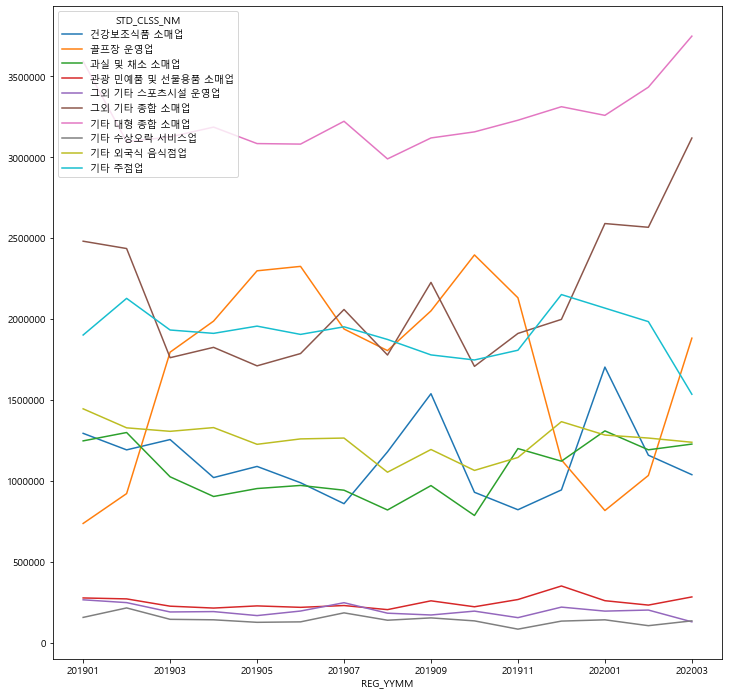

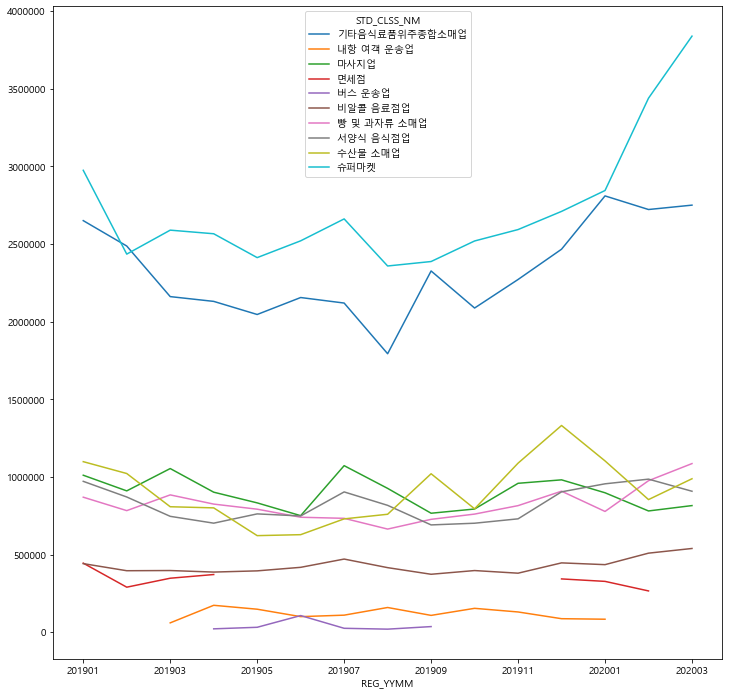

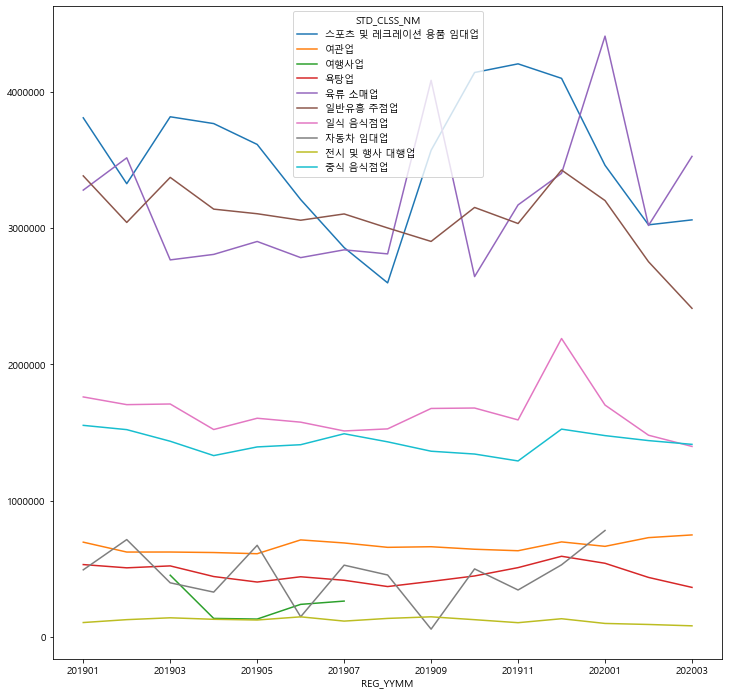

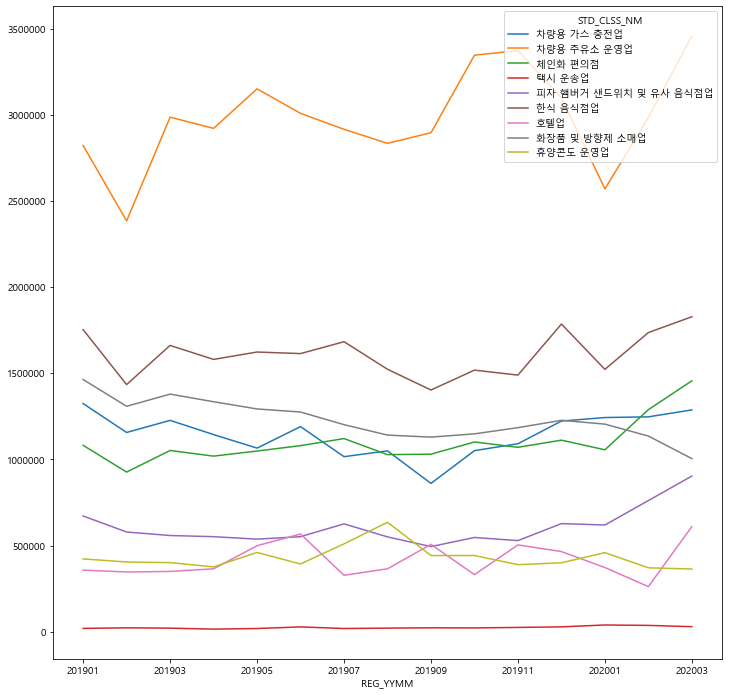

In [16]:
for i in range(0, 40, 10) :
    df_chungbuk2.iloc[:, i:i+ 10].plot(figsize=(12,12))

# 3. 경남

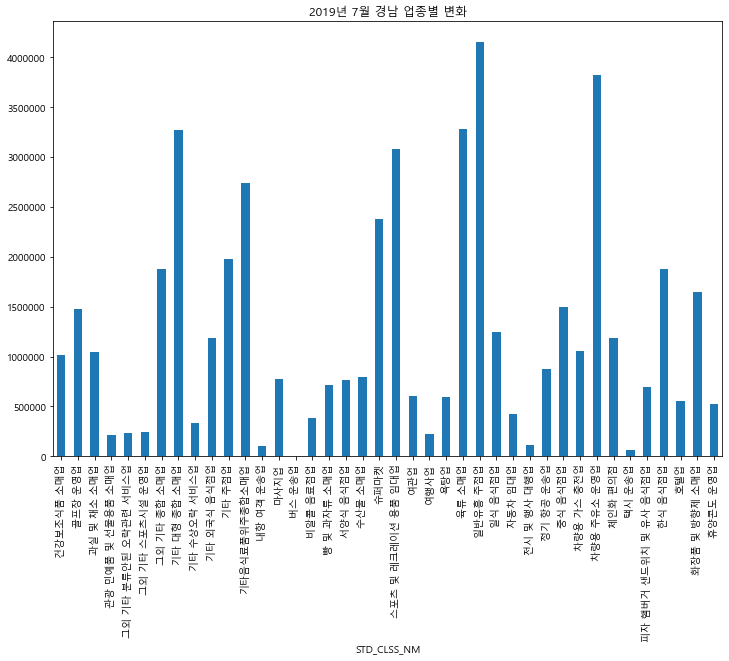

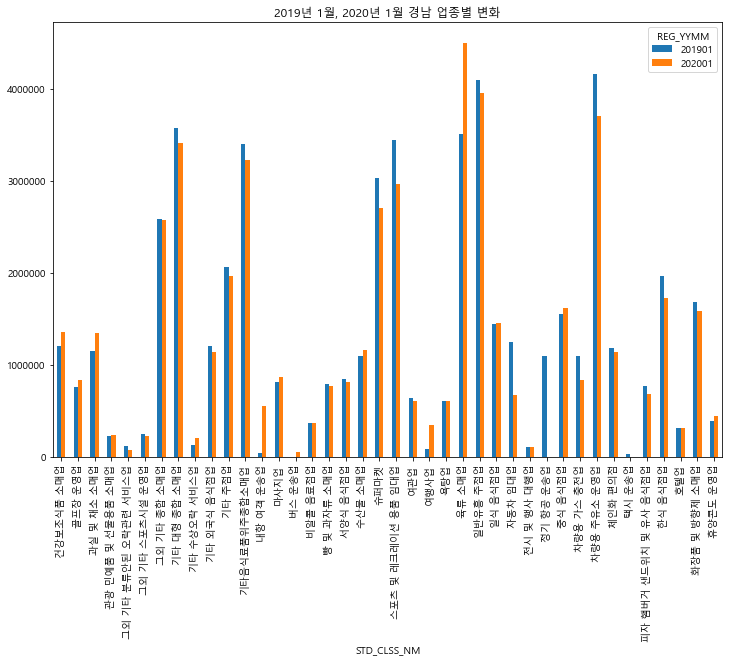

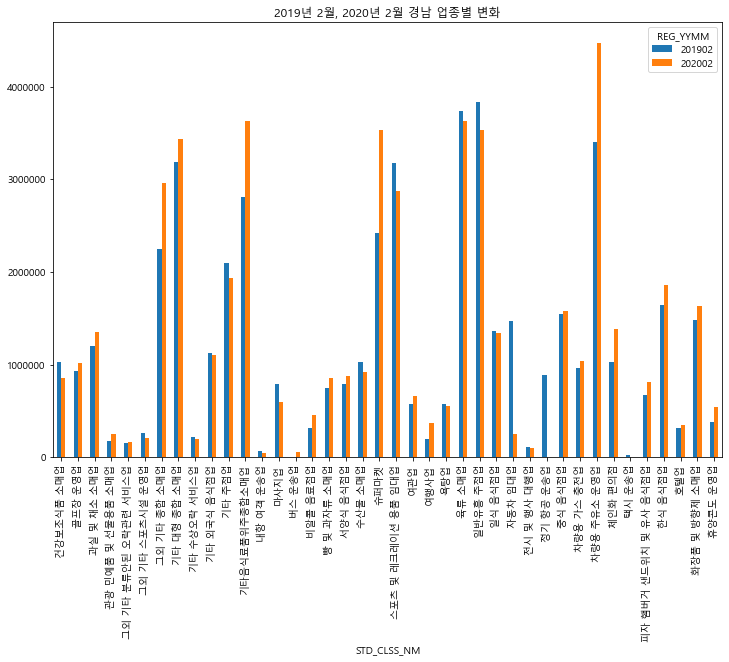

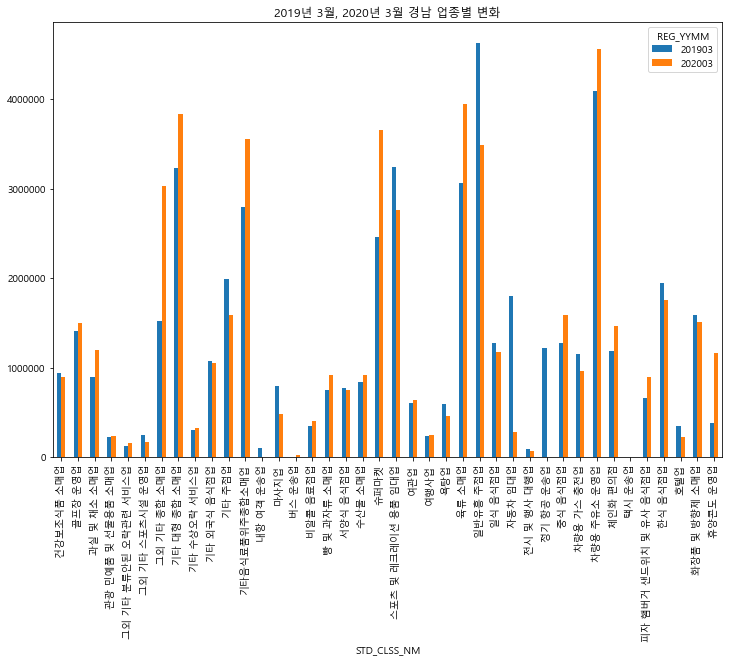

In [17]:
# 경남
df_chungnam = data_chungnam[['REG_YYMM','STD_CLSS_NM', 'AMT']]

# 19년 4월
df_chungnam = data_chungnam.pivot_table(index=['STD_CLSS_NM'], values='AMT', columns='REG_YYMM')

df_chungnam.iloc[:, 3].plot(kind='bar', title='2019년 4월 경남 업종별 변화', figsize=(12,8))

# 19년 7월
df_chungnam.iloc[:, 6].plot(kind='bar', title='2019년 7월 경남 업종별 변화', figsize=(12,8))

# 19년 1월, 20년 1월 비교
df_chungnam.iloc[:, [0, 12]].plot(kind='bar', title='2019년 1월, 2020년 1월 경남 업종별 변화', figsize=(12,8))

# 19년 2월, 20년 2월 비교
df_chungnam.iloc[:, [1, 13]].plot(kind='bar', title='2019년 2월, 2020년 2월 경남 업종별 변화', figsize=(12,8))

# 19년 3월, 20년 3월 비교
df_chungnam.iloc[:, [2, 14]].plot(kind='bar', title='2019년 3월, 2020년 3월 경남 업종별 변화', figsize=(12,8))

경남 

1. 20년1월이후 건강보조식품 소매업 감소
2. 작년대비 1,2,3월 과실 및 채소 소매업 꾸준히 증가
3. 그외 기타 종합 소매업은 계속해서 급증
4. 기타 대형 종합 소매업도 꾸준히 증가
5. 기타 주점업 꾸준히 감소
6. 기타음식표품위주종합소매업 20년1월부터 급증
7. 빵 및 과자류 소매업 20년 1월부터 꾸준히 증가
8. 20년 1월 이후 슈퍼마켓 급증
9. 20년 1,3월 육류 소매업 급증, 2월은 작년대비 감소
10. 20년 1월부터 일반유흥 주점업 꾸준히 감소
11. 20년 1월부터 자동차 임대업 급락
12. 정기항공운송업 죽음
13. 20년 1월부터 중식 음식점업 꾸준히 증가
14. 차량용 주유소 운영업 20년 1월 이후 급증
15. 20년 1월 이후 체인화 편의점 꾸준히 증가
16. 20년 1월 이후 피자 햄버거 샌드위치 및 유사 음식점업 증가
17. 20년 3월 호텔업 감소
18. 20년 2월 이후 휴양콘도 운영업 급증

# 3-1. 경남 기간별, 업종별 AMT 그래프

In [18]:
df_chungnam2 = data_chungnam.pivot_table(index='REG_YYMM', columns='STD_CLSS_NM', values='AMT')

In [19]:
df_chungnam2.head()

STD_CLSS_NM,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 분류안된 오락관련 서비스업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 대형 종합 소매업,기타 수상오락 서비스업,기타 외국식 음식점업,...,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,피자 햄버거 샌드위치 및 유사 음식점업,한식 음식점업,호텔업,화장품 및 방향제 소매업,휴양콘도 운영업
REG_YYMM,,,,,,,,,,,,,,,,,,,,,
201901,1.211502e+06,7.619814e+05,1.152725e+06,229109.889706,119666.666667,253568.367347,2.589834e+06,3.573593e+06,133760.000000,1.206238e+06,...,1.554329e+06,1.101483e+06,4.165490e+06,1.189488e+06,32466.666667,773790.281615,1.968279e+06,322260.812854,1.690666e+06,394557.400271
201902,1.032695e+06,9.345343e+05,1.203990e+06,176669.913793,150714.285714,262253.448276,2.248821e+06,3.189697e+06,219800.000000,1.122058e+06,...,1.548533e+06,9.671649e+05,3.401862e+06,1.027513e+06,23740.000000,673658.567476,1.641096e+06,318336.714286,1.480349e+06,381473.280914
201903,9.376905e+05,1.407282e+06,8.934088e+05,223394.642857,124125.000000,245513.953488,1.525090e+06,3.227937e+06,302475.000000,1.073652e+06,...,1.280765e+06,1.152372e+06,4.094325e+06,1.189523e+06,NaN,666222.816069,1.948918e+06,348244.527559,1.584482e+06,381875.874126
201904,1.014472e+06,1.428115e+06,8.909907e+05,218410.120000,150200.000000,238307.407407,1.581404e+06,3.267893e+06,329458.333333,1.055392e+06,...,1.198319e+06,1.058741e+06,3.827854e+06,1.145978e+06,64120.000000,636629.068736,1.814310e+06,377329.494318,1.615151e+06,427736.092150
201905,1.047076e+06,1.590239e+06,9.156560e+05,194151.373626,125222.222222,173623.684211,1.485624e+06,3.082767e+06,356042.884615,1.117995e+06,...,1.222049e+06,1.030800e+06,4.134393e+06,1.167363e+06,64710.000000,628477.942612,1.868737e+06,775642.307692,1.614280e+06,455238.969780


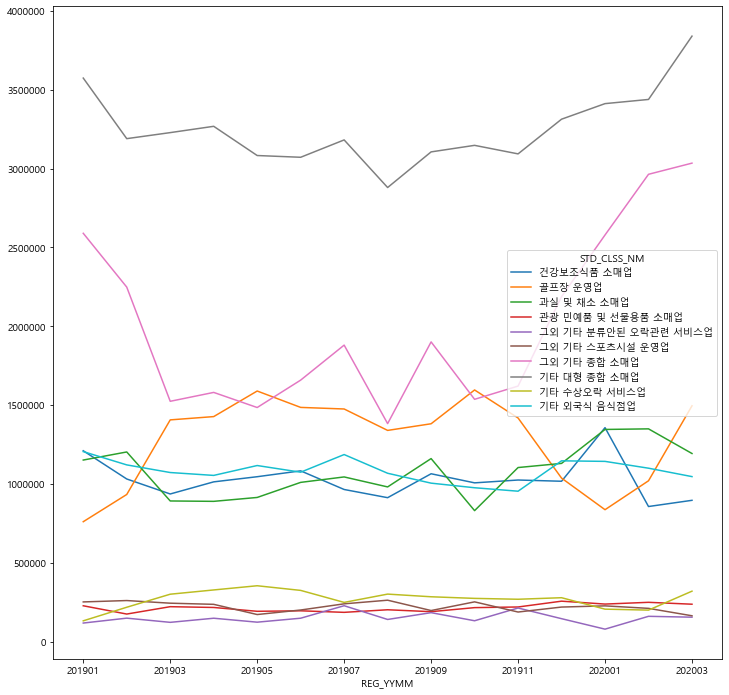

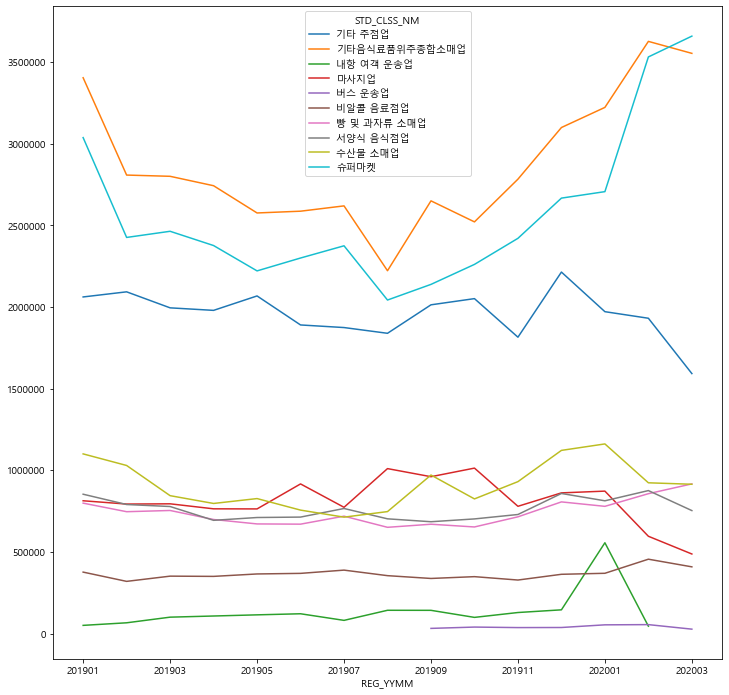

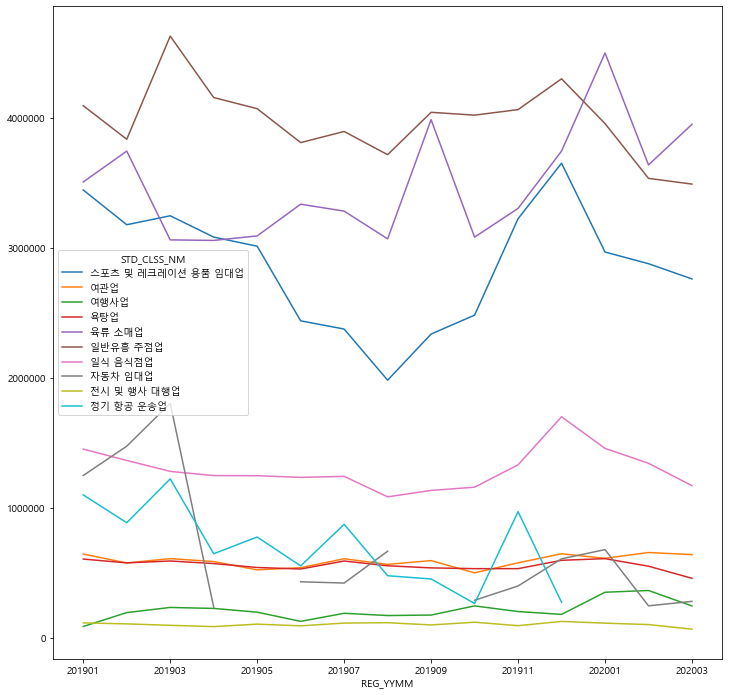

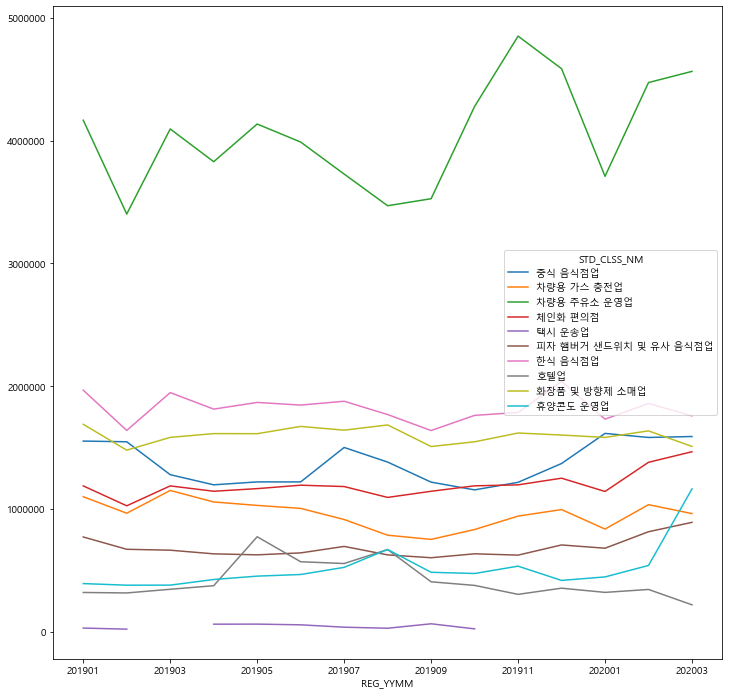

In [20]:
for i in range(0, 40, 10) :
    df_chungnam2.iloc[:, i:i+ 10].plot(figsize=(12,12))

# 4. 대구

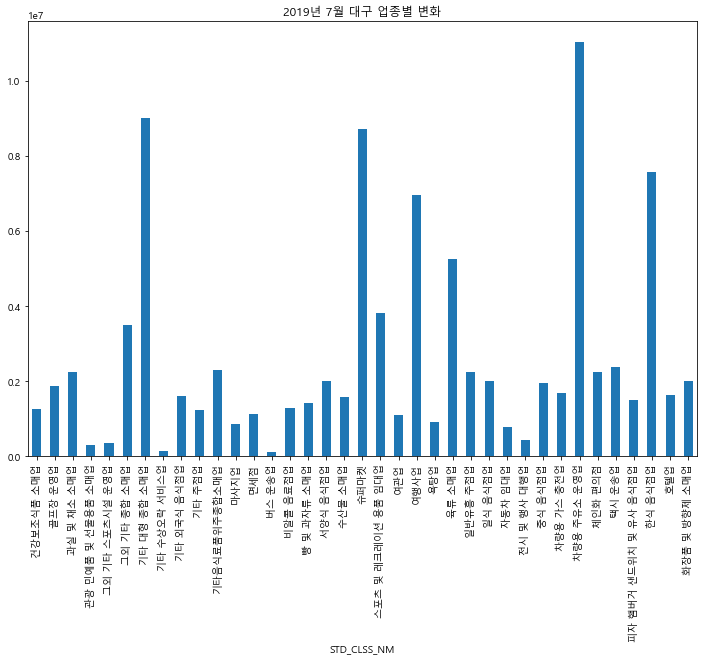

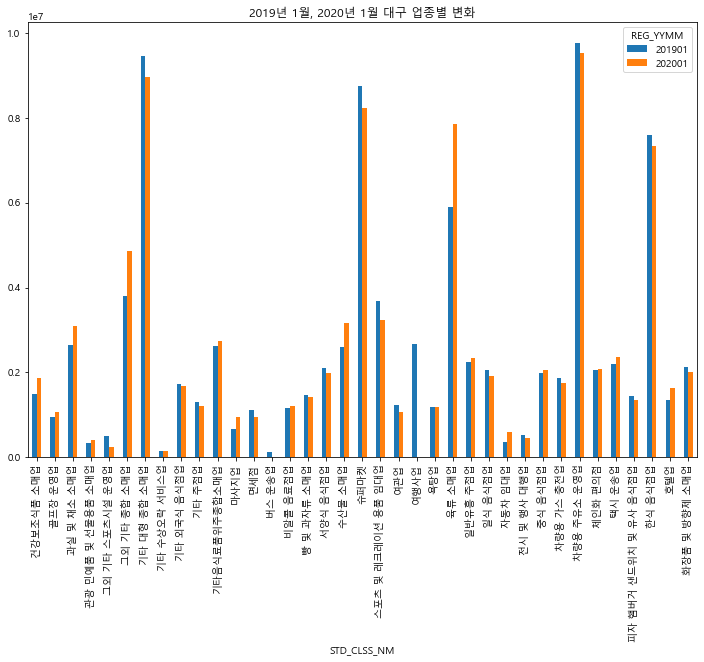

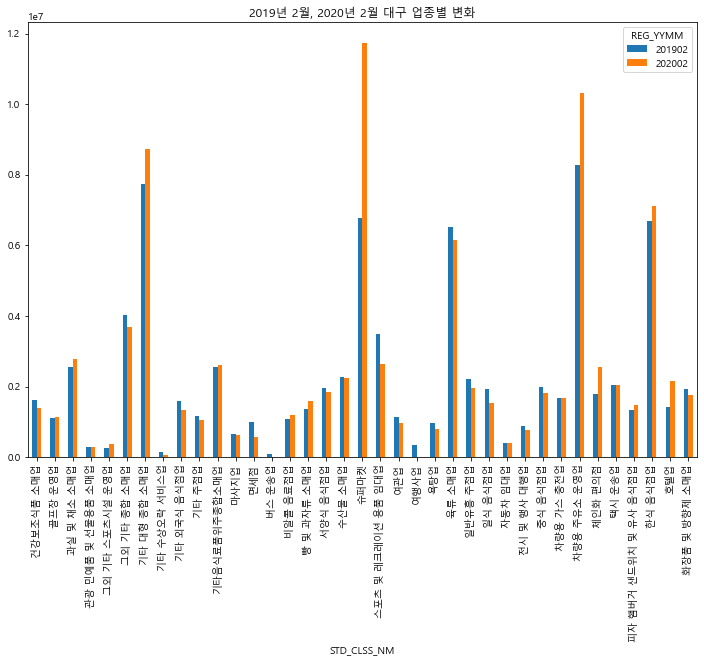

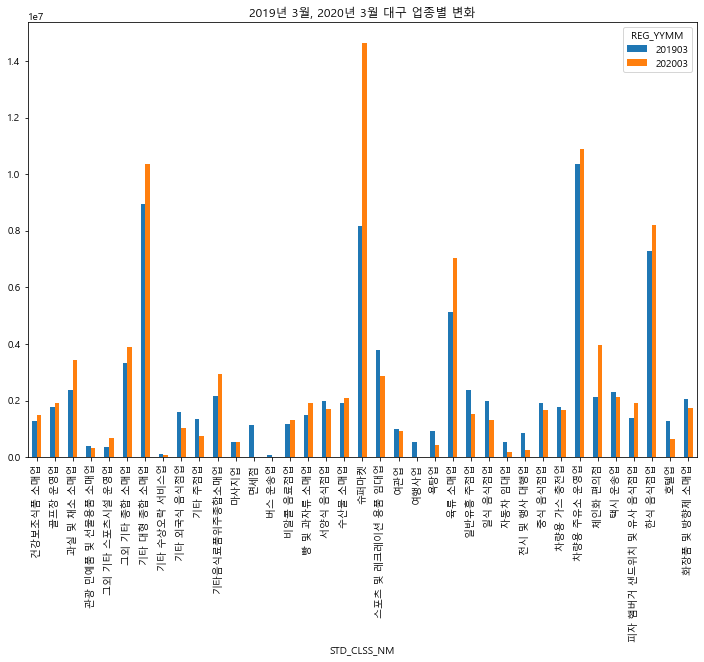

In [21]:
# 대구
df_daegu = data_daegu[['REG_YYMM','STD_CLSS_NM', 'AMT']]

# 19년 4월
df_daegu = data_daegu.pivot_table(index=['STD_CLSS_NM'], values='AMT', columns='REG_YYMM')

df_daegu.iloc[:, 3].plot(kind='bar', title='2019년 4월 대구 업종별 변화', figsize=(12,8))

# 19년 7월
df_daegu.iloc[:, 6].plot(kind='bar', title='2019년 7월 대구 업종별 변화', figsize=(12,8))

# 19년 1월, 20년 1월 비교
df_daegu.iloc[:, [0, 12]].plot(kind='bar', title='2019년 1월, 2020년 1월 대구 업종별 변화', figsize=(12,8))

# 19년 2월, 20년 2월 비교
df_daegu.iloc[:, [1, 13]].plot(kind='bar', title='2019년 2월, 2020년 2월 대구 업종별 변화', figsize=(12,8))

# 19년 3월, 20년 3월 비교
df_daegu.iloc[:, [2, 14]].plot(kind='bar', title='2019년 3월, 2020년 3월 대구 업종별 변화', figsize=(12,8))

대구 

1. 20년 1월 부터 과실 및 채소 소매업 꾸준히 증가
2. 20년 1월 부터 그외 기타 종합 소매업 증가
3. 대형 소매업도 마찬가지
4. 기타음식료품위주종합소매업도 마찬가지
5. 20년 1월 부터 슈퍼마켓 급증
6. 20년 3월 육류 소매업 급증
7. 20년 1월 이후 일반유흥 주점업 감소
8. 20년 2월 차량용 주유소 운영업 급증하고 3월에 감소
9. 20년 1월 부터 체인화 편의점 급증
10. 20년 1월 부터 피자 햄버거 샌드위치 및 유사 음식업점 꾸준히 증가
11. 20년 1월 이후 한식 음식점업 증가
12. 20년 3월 호텔업 급감

# 4-1. 대구 기간별, 업종별 AMT 그래프

In [22]:
df_daegu2 = data_daegu.pivot_table(index='REG_YYMM', columns='STD_CLSS_NM', values='AMT')

In [23]:
df_daegu2.head()

STD_CLSS_NM,건강보조식품 소매업,골프장 운영업,과실 및 채소 소매업,관광 민예품 및 선물용품 소매업,그외 기타 스포츠시설 운영업,그외 기타 종합 소매업,기타 대형 종합 소매업,기타 수상오락 서비스업,기타 외국식 음식점업,기타 주점업,...,전시 및 행사 대행업,중식 음식점업,차량용 가스 충전업,차량용 주유소 운영업,체인화 편의점,택시 운송업,피자 햄버거 샌드위치 및 유사 음식점업,한식 음식점업,호텔업,화장품 및 방향제 소매업
REG_YYMM,,,,,,,,,,,,,,,,,,,,,
201901,1.482275e+06,9.570161e+05,2.651614e+06,346829.444444,509487.179487,3.790780e+06,9.449159e+06,155678.571429,1.722794e+06,1.291791e+06,...,526711.729958,1.980750e+06,1.866316e+06,9.762721e+06,2.047157e+06,2.195679e+06,1.449550e+06,7.595143e+06,1.357060e+06,2.137358e+06
201902,1.624979e+06,1.110002e+06,2.560290e+06,302443.750000,256675.862069,4.024377e+06,7.742053e+06,139406.666667,1.591274e+06,1.179717e+06,...,888564.761029,1.988520e+06,1.679424e+06,8.285438e+06,1.785232e+06,2.046749e+06,1.334238e+06,6.699375e+06,1.431893e+06,1.944257e+06
201903,1.277872e+06,1.793076e+06,2.389487e+06,389092.040816,366250.000000,3.320483e+06,8.950115e+06,133641.666667,1.611038e+06,1.348639e+06,...,855284.855072,1.934652e+06,1.777626e+06,1.036209e+07,2.129360e+06,2.317389e+06,1.380383e+06,7.306285e+06,1.288528e+06,2.048292e+06
201904,1.261514e+06,1.815143e+06,2.255055e+06,309523.030303,363650.000000,3.259498e+06,9.020142e+06,137100.000000,1.546057e+06,1.123233e+06,...,405660.538117,1.856574e+06,1.666192e+06,1.006990e+07,1.989099e+06,2.207075e+06,1.397577e+06,6.921399e+06,1.646797e+06,1.997605e+06
201905,1.510896e+06,1.852249e+06,2.380561e+06,264085.990196,359555.000000,3.532300e+06,9.096871e+06,102583.333333,1.597414e+06,1.203621e+06,...,887014.652318,1.944371e+06,1.804486e+06,1.090178e+07,2.128343e+06,2.352409e+06,1.407494e+06,7.386983e+06,1.437617e+06,2.025972e+06


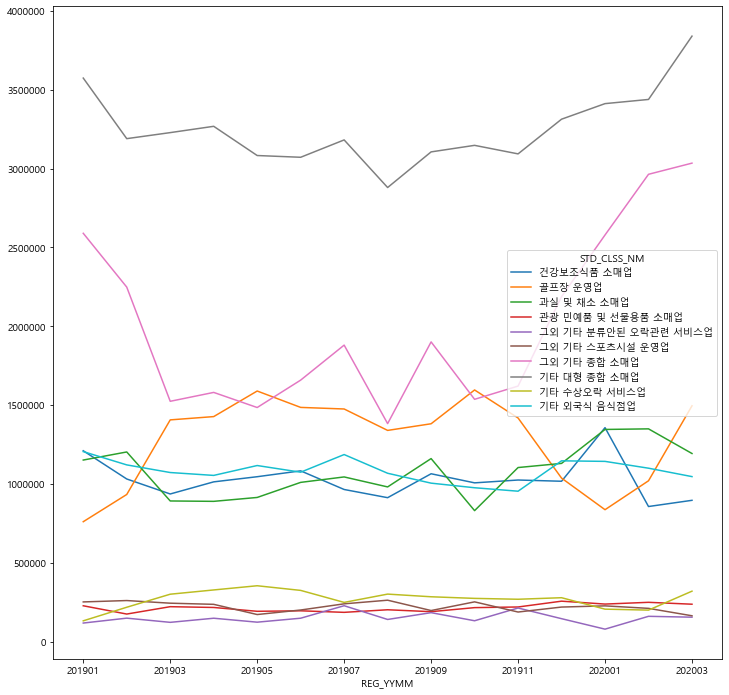

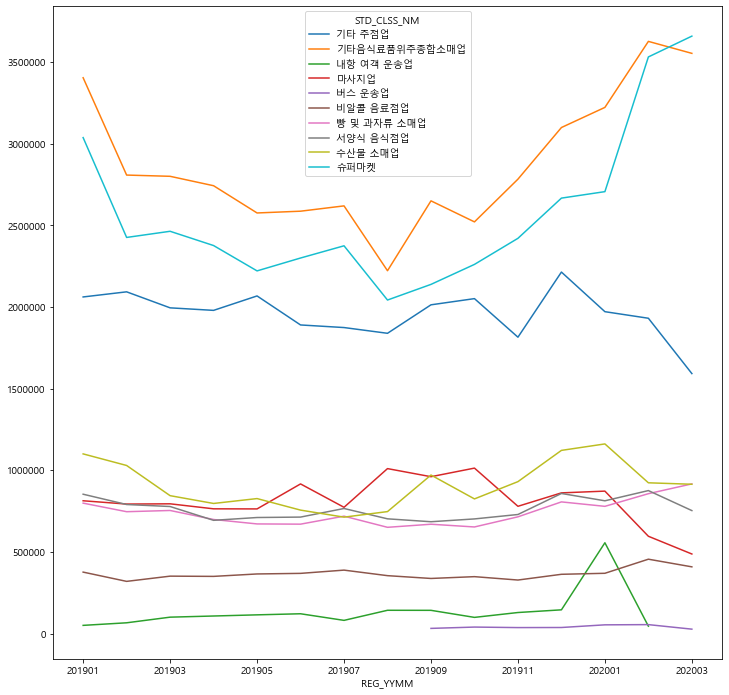

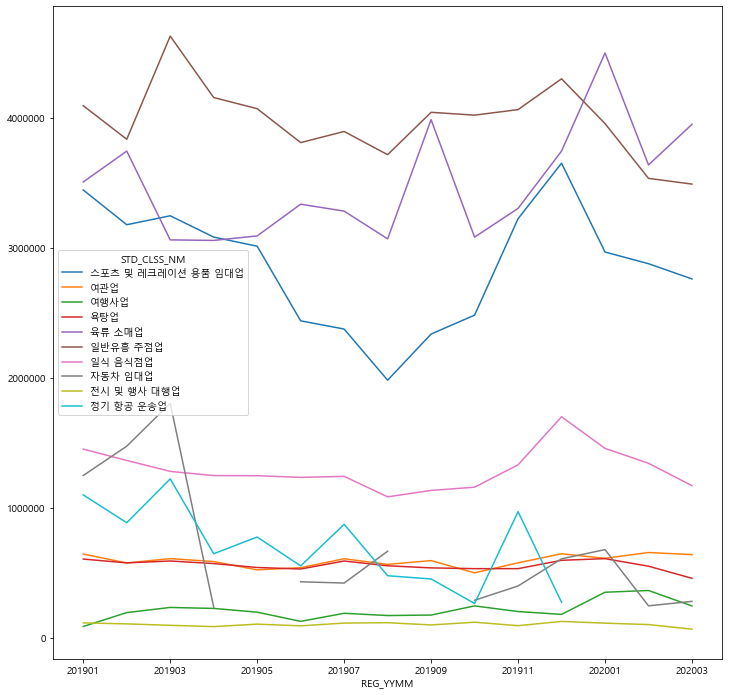

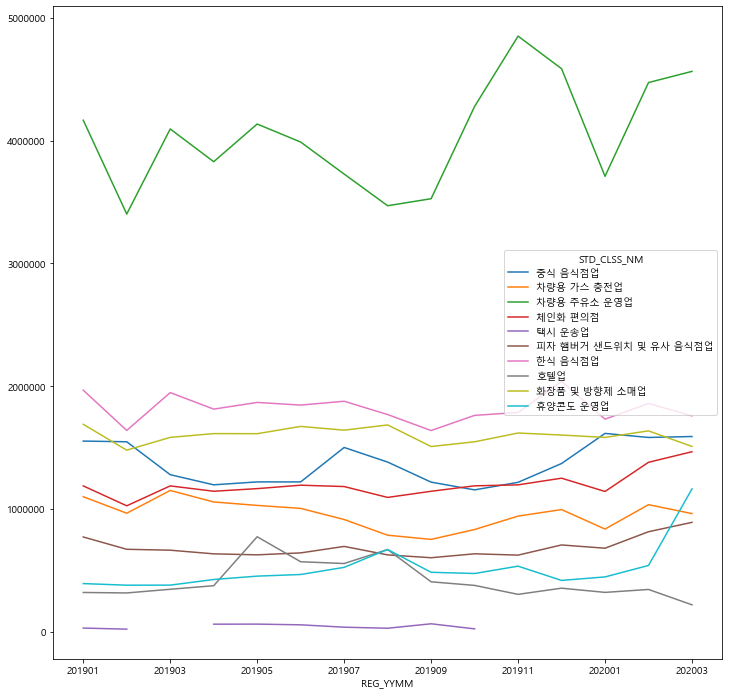

In [24]:
for i in range(0, 40, 10) :
    df_chungnam2.iloc[:, i:i+ 10].plot(figsize=(12,12))

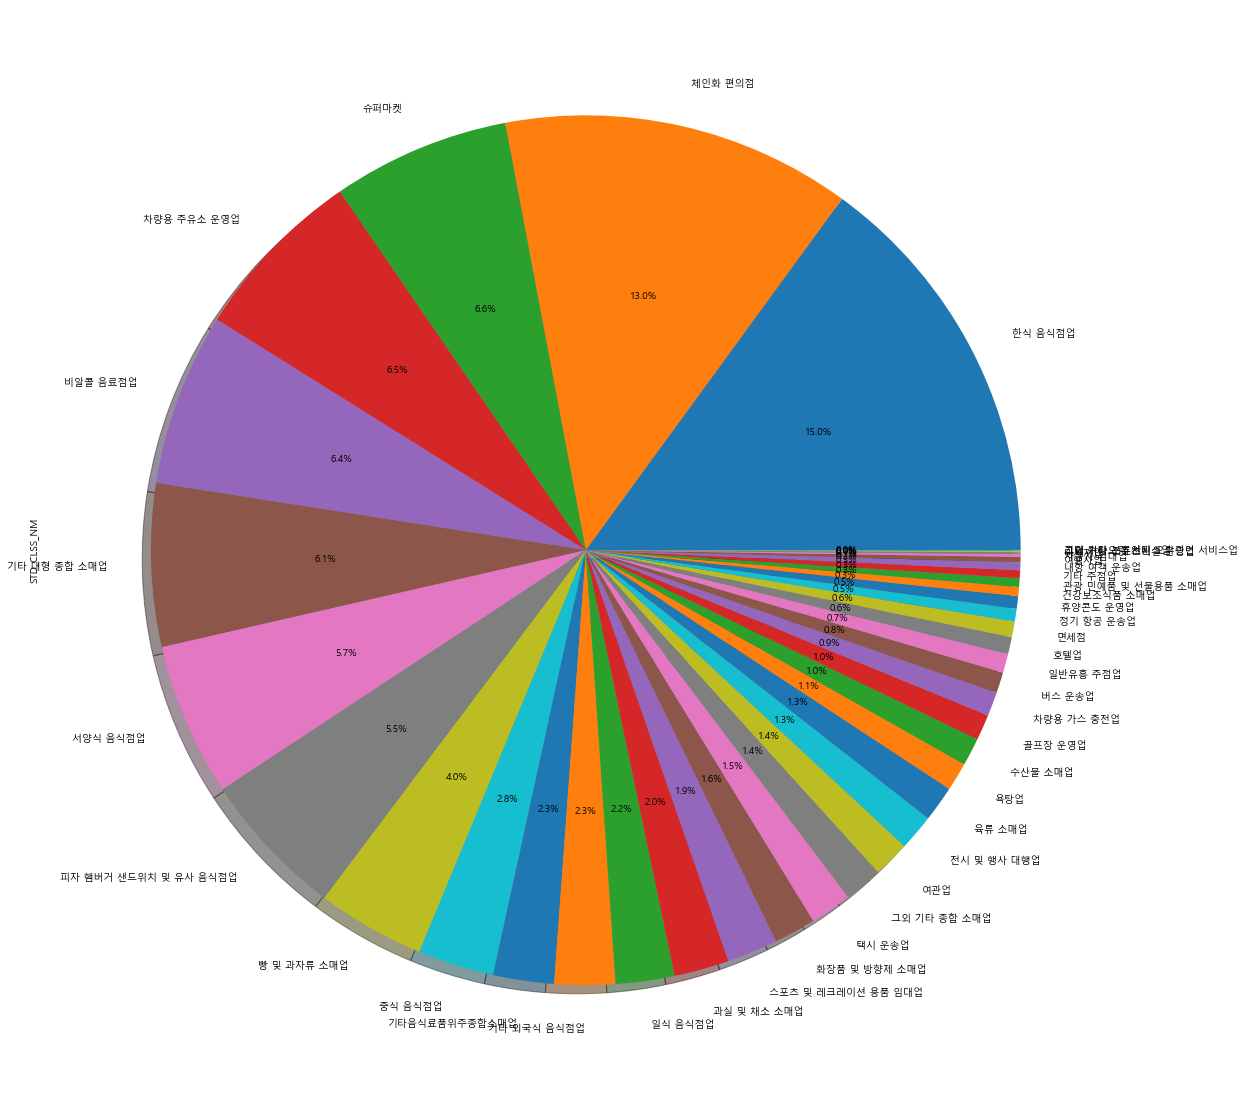

In [25]:
df["STD_CLSS_NM"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, figsize=(20,20))
plt.show()

In [26]:
data = pd.read_csv('../다콘프로젝트/제주데이터/data_rev.csv', index_col=0)

In [27]:
data['CARD_SIDO_NM'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

# 원핫인코딩

In [28]:
data = data.join(pd.get_dummies(data['CARD_SIDO_NM']))
data = data.join(pd.get_dummies(data['STD_CLSS_NM']))

In [29]:
#data.to_csv('one-hot.csv', encoding='utf-8-sig')

In [30]:
# AMT 의 증감 요소가 있을것..

In [31]:
# AMT와 CSTMR_CNT, AMT와 CNT 의 상관계수가 0.866339, 0.778102임 상당히 높음
df.corr()

,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
SEX_CTGO_CD,1.000000,-0.023134,0.008258,-0.005424,0.000469
FLC,-0.023134,1.000000,0.006774,0.041099,-0.001011
CSTMR_CNT,0.008258,0.006774,1.000000,0.866339,0.930356
AMT,-0.005424,0.041099,0.866339,1.000000,0.778102
CNT,0.000469,-0.001011,0.930356,0.778102,1.000000


# 소비자 동향 조사

In [32]:
so = pd.read_csv('../다콘프로젝트/제주데이터/소비자동향조사_지역__20200630091122.csv', encoding='cp949')
so

,CSI_CODE별,BRANCH_CODE별,2019. 01,2019. 02,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12,2020. 01,2020. 02,2020. 03,2020. 04,2020. 05,2020. 06
0,현재생활형편CSI,부산,82.0,87.0,84.0,87.0,87.0,85.0,85.0,86.0,85.0,89.0,86.0,85.0,87.0,84.0,75.0,68.0,72.0,77
1,현재생활형편CSI,대구경북,86.0,88.0,87.0,89.0,89.0,88.0,88.0,83.0,85.0,85.0,87.0,87.0,89.0,87.0,73.0,69.0,71.0,78
2,현재생활형편CSI,인천,87.0,87.0,89.0,94.0,90.0,88.0,88.0,90.0,90.0,89.0,88.0,89.0,92.0,90.0,81.0,76.0,80.0,79
3,현재생활형편CSI,광주전남,94.0,93.0,92.0,94.0,92.0,94.0,93.0,91.0,93.0,94.0,93.0,92.0,92.0,91.0,82.0,79.0,81.0,85
4,현재생활형편CSI,대전충남,91.0,95.0,94.0,94.0,93.0,94.0,95.0,89.0,92.0,94.0,92.0,94.0,93.0,95.0,85.0,79.0,78.0,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,소비자심리지수,충북,98.9,98.5,99.6,99.0,97.1,96.1,95.8,90.0,94.2,95.2,95.6,96.3,100.9,94.7,79.3,72.4,83.5,-
139,소비자심리지수,전북,99.2,102.2,102.6,100.7,100.2,102.1,100.4,96.2,100.4,100.5,104.0,103.1,107.1,100.9,87.5,80.6,86.7,-
140,소비자심리지수,경남,92.6,92.6,94.8,97.9,95.5,93.0,93.8,91.1,92.9,94.6,97.6,96.2,98.5,95.2,79.3,68.6,78.0,79.6
141,소비자심리지수,제주,97.1,98.3,99.3,101.5,98.4,101.2,100.2,96.6,99.5,99.4,98.6,98.7,101.0,92.3,70.2,78.8,78.5,-


In [33]:
# 소비자심리지수만 사용
so = so[so['CSI_CODE별'] == '소비자심리지수']

In [34]:
so = so.rename(columns={'BRANCH_CODE별':'CARD_SIDO_NM'})

In [35]:
so2_2020_03 = so.iloc[:, [0,1,-4]]

In [36]:
so2_2020_03

,CSI_CODE별,CARD_SIDO_NM,2020. 03
130,소비자심리지수,부산,80.2
131,소비자심리지수,대구경북,74.6
132,소비자심리지수,인천,80.4
133,소비자심리지수,광주전남,79.7
134,소비자심리지수,대전충남,82.0
135,소비자심리지수,울산,71.6
136,소비자심리지수,경기,80.5
137,소비자심리지수,강원,79.9
138,소비자심리지수,충북,79.3
139,소비자심리지수,전북,87.5


In [37]:
df_202003 = pd.read_csv('../다콘프로젝트/제주데이터/data202003.csv', index_col=0)

In [38]:
df_202003

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
23437284,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,6,2529000,6
23437285,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,10,1133650,9
23437286,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,3,570800,3
23437287,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,25,4192828,25
23437288,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3358900,24
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [39]:
# 제주 3월 데이터랑 so2_2020_03 merge

df_so_202003 = pd.merge(df_202003, so2_2020_03, how='inner', on='CARD_SIDO_NM')

In [40]:
#df_so_202003.drop('CSI_CODE별', inplace=True, axis=1)

In [41]:
df_so_202003 = df_so_202003.rename(columns={'2020. 03':'소비자심리지수'})
df_so_202003

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,CSI_CODE별,소비자심리지수
0,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,6,2529000,6,소비자심리지수,79.9
1,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,10,1133650,9,소비자심리지수,79.9
2,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,2,3,3,570800,3,소비자심리지수,79.9
3,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,1,4,25,4192828,25,소비자심리지수,79.9
4,202003,강원,강릉시,건강보조식품 소매업,강원,강릉시,50s,2,4,21,3358900,24,소비자심리지수,79.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687124,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4,소비자심리지수,79.3
687125,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3,소비자심리지수,79.3
687126,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6,소비자심리지수,79.3
687127,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6,소비자심리지수,79.3


In [42]:
df_so_202003_2 = df_so_202003.pivot_table(index=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], values=['AMT', '소비자심리지수'])
df_so_202003_2

AMT  소비자심리지수
REG_YYMM CARD_SIDO_NM STD_CLSS_NM                                 
202003   강원           건강보조식품 소매업             1.185914e+06     79.9
                      골프장 운영업                2.036172e+06     79.9
                      과실 및 채소 소매업            7.105835e+05     79.9
                      관광 민예품 및 선물용품 소매업      1.040414e+05     79.9
                      그외 기타 스포츠시설 운영업        5.187500e+05     79.9
...                                                   ...      ...
         충북           피자 햄버거 샌드위치 및 유사 음식점업  9.033278e+05     79.3
                      한식 음식점업                1.827617e+06     79.3
                      호텔업                    6.099420e+05     79.3
                      화장품 및 방향제 소매업          1.004406e+06     79.3
                      휴양콘도 운영업               3.638140e+05     79.3

[333 rows x 2 columns]

In [43]:
df_so_202003_2.corr()

,AMT,소비자심리지수
AMT,1.00000,-0.27165
소비자심리지수,-0.27165,1.00000


In [44]:
df_202003['CARD_SIDO_NM'].unique()

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [45]:
so['CARD_SIDO_NM'].unique()

array(['부산', '대구경북', '인천', '광주전남', '대전충남', '울산', '경기', '강원', '충북', '전북',
       '경남', '제주', '강릉'], dtype=object)

# 4월 예측 2, 3 월 AMT 비교해서 지수 곱하고 햅보자

In [96]:
df202002 = df[df['REG_YYMM'] == '202002']
df202002 = df202002[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
df202002.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
22098304,202002,강원,건강보조식품 소매업,335000
22098305,202002,강원,건강보조식품 소매업,149000
22098306,202002,강원,건강보조식품 소매업,502200
22098307,202002,강원,건강보조식품 소매업,4973500
22098308,202002,강원,건강보조식품 소매업,2489494


In [97]:
df202003 = df[df['REG_YYMM'] == '202003']
df202003 = df202003[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
df202003.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,AMT
23437284,202003,강원,건강보조식품 소매업,2529000
23437285,202003,강원,건강보조식품 소매업,1133650
23437286,202003,강원,건강보조식품 소매업,570800
23437287,202003,강원,건강보조식품 소매업,4192828
23437288,202003,강원,건강보조식품 소매업,3358900


In [105]:
df202002 = df202002.pivot_table(index=['STD_CLSS_NM'], values='AMT', aggfunc=np.sum)

In [106]:
df202003 = df202003.pivot_table(index=['STD_CLSS_NM'], values='AMT', aggfunc=np.sum)

In [155]:
df202002.head()

,AMT
STD_CLSS_NM,
건강보조식품 소매업,5340082879
골프장 운영업,18228841136
과실 및 채소 소매업,34708535677
관광 민예품 및 선물용품 소매업,531651593
그외 기타 분류안된 오락관련 서비스업,1379750


In [156]:
df202003.head()

,AMT
STD_CLSS_NM,
건강보조식품 소매업,5753676884
골프장 운영업,39398851940
과실 및 채소 소매업,42491078825
관광 민예품 및 선물용품 소매업,463741220
그외 기타 분류안된 오락관련 서비스업,1580200


In [132]:
df_AMT2 = (df202002['AMT'] - df202003['AMT']) / df202002['AMT']
df_AMT2 = df_AMT2.to_frame()

Text(0.5, 1.0, '2020.03의 AMT 증감률')

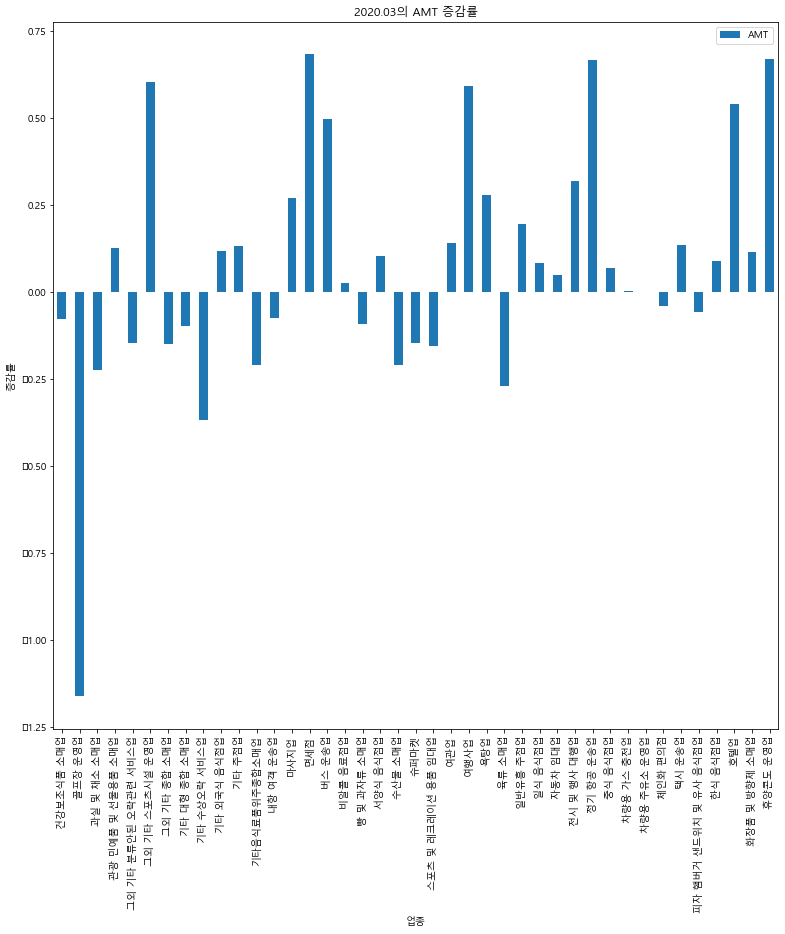

In [154]:
df_AMT2.plot(kind='bar', figsize=(13,13))
plt.xlabel('업종')
plt.ylabel('증감률')
plt.title('2020.03의 AMT 증감률')